### Student details

Student name: Alessandro Gostoli

Student ID: 23251107

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [1]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [2]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            
                errors = 0
                for xi, target in zip(X, y):
                    update = self.eta * (target - self.predict(xi))
                    self.w_[1:] +=  update * xi
                    self.w_[0] +=  update
                    errors += int(update != 0.0)
                self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [3]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

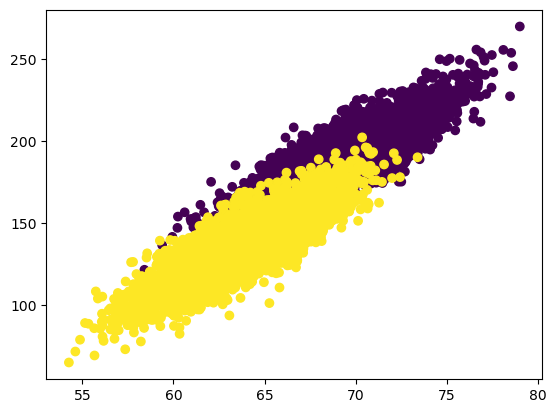

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plt.scatter(X[:,0], X[:,1],c=y)

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [5]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [6]:
#Defining the perceptron and training it on the data
ppn = Perceptron()
ppn.train(X_train, y_train)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [7]:
from sklearn.metrics import accuracy_score

#Predict the output classes and finding the accuracy
y_pred = ppn.predict(X_test)

acc = accuracy_score(y_test,y_pred)

print(f"Accuracy = {acc}")


Accuracy = 0.8545454545454545


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

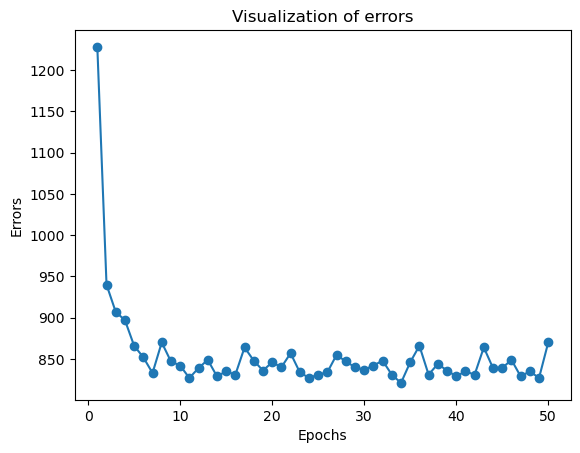

In [8]:
#Visualizing the errors

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.title("Visualization of errors")
plt.xlabel("Epochs")
plt.ylabel("Errors")
plt.show() 

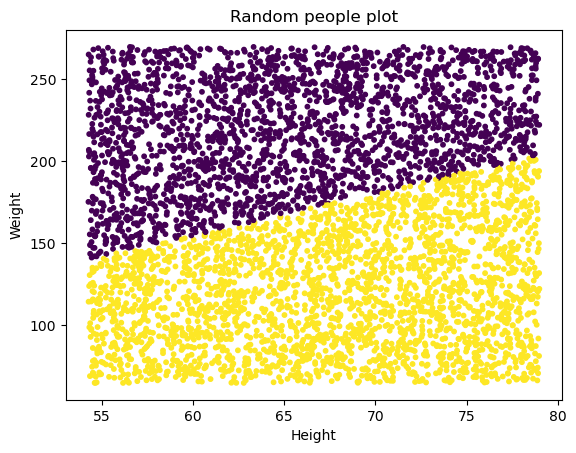

In [9]:
import random 


n_inputs = 5000
i = 0
people_heights = []
people_weights = []

people_heights = np.random.uniform(min(data.Height), max(data.Height),n_inputs)
people_weights = np.random.uniform(min(data.Weight), max(data.Weight), n_inputs)
    
random_data = np.column_stack((people_heights, people_weights))

random_y_pred = ppn.predict(random_data)

plt.scatter(people_heights, people_weights, c=random_y_pred, s=10)
plt.title("Random people plot")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show() 

# Early exit perceptron

In [10]:
class PerceptronEE(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            
                errors = 0
                for xi, target in zip(X, y):
                    update = self.eta * (target - self.predict(xi))
                    self.w_[1:] +=  update * xi
                    self.w_[0] +=  update
                    errors += int(update != 0.0)
                self.errors_.append(errors)
                #Updated Perceptron defining an early exit
                if(errors < 850):
                    break
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [11]:
#Defining the early exit perceptron and training it on the data

ppn_early = PerceptronEE()
ppn_early.train(X_train, y_train)


#Predict the output classes with the early exit perceptron
y_pred_early = ppn.predict(X_test)

acc_early = accuracy_score(y_test,y_pred_early)

print(f"Accuracy = {acc_early}")


Accuracy = 0.8545454545454545


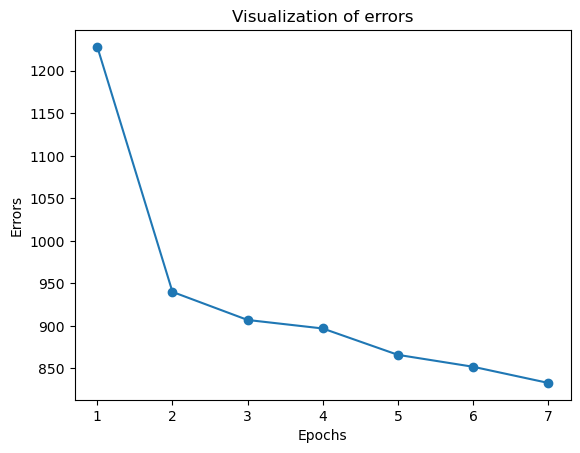

In [12]:
#Visualizing the errors in early exit perceptron

plt.plot(range(1, len(ppn_early.errors_)+1), ppn_early.errors_, marker='o')
plt.title("Visualization of errors")
plt.xlabel("Epochs")
plt.ylabel("Errors")
plt.show() 

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


# 1
During each epoch, the model is updated with the training data, and its parameters are adjusted to minimize the loss function, which measures the difference between the prediction of the model and the target values. After a few epochs, the performances are not getting better and the trend of the graph is fluctuating around value 850. When the model doesn't increase its accuracy or gets worse during epochs it's good to set an early exit to not make the model overfit the training data

# 2
We don't get to the best solution in the last epoch. We get the best solution at epoch 34. That's because, after a few epochs, the accuracy is not improving significantly anymore. After a certain amount of epochs, the model is not able to improve because there are many factors that affect the training. For example, noise in the data or a limited amount of data can make it impossible for the accuracy to overcome a certain limit. Also, the complexity of a problem can be the reason for this when the relationship between input and output is not perfectly deterministic.

# 3

For the same reasons that cause the accuracy to fluctuate, we can't get the perfect model with zero error. If we get this it means that the model overfitted the data and it will perform poorly on unseen data. In machine learning, we always need to find a good balance between variance and bias to perform well in both training and test data